In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import re
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [3]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/06_DeformedWingFlutter/'

In [189]:
sharpy_results = {}

sharpy_results['wo_skin'] = {'path': path_to_results + '/sharpy_skin_off',
                             'alpha': np.array([0.25, 0.5, 1, 2, 3, 4, 5]),
                            'skin': False}
sharpy_results['wo_skin_te'] = {'path': path_to_results + '/sharpy_skin_off_te1',
                             'alpha': np.array([0.25, 0.5, 1, 2, 3, 4, 5]),
                            'skin': False}
sharpy_results['w_skin'] = {'path': path_to_results + '/sharpy_skin_on',
                             'alpha': np.array([0.25, 0.5, 1, 2, 3, 4, 5]),
                            'skin': True}
sharpy_results['w_skin_te'] = {'path': path_to_results + '/sharpy_skin_on_te1',
                             'alpha': np.array([0.25, 0.5, 1, 2, 3, 4, 5]),
                            'skin': True}

In [190]:
for case in sharpy_results.values():
    case['vgf'] = [np.loadtxt(case['path'] + '/velocity_damping_frequency_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]
    case['v_eigs'] = [np.loadtxt(case['path'] + '/velocity_eigenvalues_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]
    case['deflection'] = [np.loadtxt(case['path'] + '/velocity_wingtip_deflection_g_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]
    case['flutter_deflection'] = [np.loadtxt(case['path'] + '/flutter_speeds_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]

In [292]:
mrm_results = {}
mrm_results['umbeam_wo_skin'] = {'path': path_to_results + '/mrm_umbeam_wo_skin',
                                 'alpha': np.array([0, 5,]),
                                 'skin': False}
mrm_results['umbeam_w_skin'] = {'path': path_to_results + '/mrm_umbeam_w_skin',
                                 'alpha': np.array([0, 5,]),
                                 'skin': True}
mrm_results['nastran'] = {'path': path_to_results + '/mrm_nastran',
                                 'alpha': np.array([0, 5,]),
                                 'skin': True}
mrm_results['nastran_te'] = {'path': path_to_results + '/mrm_nastran_te1',
                                 'alpha': np.array([0, 5,]),
                                 'skin': True}

for case in mrm_results.values():
    case['vgf'] = []
    for aoa in case['alpha']:
        try:
            case['vgf'].append(np.loadtxt(case['path'] + '/velocity_frequency_alpha{:04g}.txt'.format(aoa * 100)))
        except OSError:
            case['vgf'].append(0)
#     case['deflection'] = [np.loadtxt(case['path'] + '/velocity_wingtip_deflection_g_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]
    case['flutter_deflection'] = [np.loadtxt(case['path'] + '/flutter_speeds_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]

In [191]:
# load 0 aoa case
path_to_zero_aoa = '/home/ng213/pazy_code/pazy-aepw3-results/05_StraightWingFlutter/'
results = {}

results['sharpy_wo_skin'] = {'path': path_to_zero_aoa + '/skin_off/',
                            'skin': False,
                            'marker_style': {'facecolor': 'none',
                                            'marker': 'o',
                                            'linewidth': 0.5}}

results['sharpy_w_skin'] = {'path': path_to_zero_aoa + '/skin_on/',
                            'skin': True,
                            'marker_style': {'facecolor': 'none',
                                             'marker': '^',
                                            'linewidth': 0.5}}

results['sharpy_wo_skin_te'] = {'path': path_to_zero_aoa + '/skin_offte_mass/',
                            'skin': False,
                                'marker_style': {'facecolor': 'none',
                                             'marker': 'o',
                                            'linewidth': 0.5}}

results['sharpy_w_skin_te'] = {'path': path_to_zero_aoa + '/skin_onte_mass/',
                                'skin': True,
                               'marker_style': {'facecolor': 'none',
                                             'marker': '^',
                                            'linewidth': 0.5}}
for case in results.values():
    case['eigs'] = np.loadtxt(case['path'] + '/vel_eigs.txt')
    case['vg'] = np.loadtxt(case['path'] + '/stability_analysis.txt')
    with open(case['path'] + '/flutter.txt', 'r') as f:
        case['flutter_str'] = f.read()
    case['flutter_speed'] = float(re.findall("\d+\.\d+", case['flutter_str'])[0])

In [192]:
#Label line with line2D label data
from math import atan2,degrees

def labelLine(line,x,label=None,align=True,**kwargs):

    ax = line.axes
    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if (x < xdata[0]) or (x > xdata[-1]):
        print('x label location is outside data range!')
        return

    #Find corresponding y co-ordinate and angle of the line
    ip = 1
    for i in range(len(xdata)):
        if x < xdata[i]:
            ip = i
            break

    y = ydata[ip-1] + (ydata[ip]-ydata[ip-1])*(x-xdata[ip-1])/(xdata[ip]-xdata[ip-1])

    if not label:
        label = line.get_label()

    if align:
        #Compute the slope
        dx = xdata[ip] - xdata[ip-1]
        dy = ydata[ip] - ydata[ip-1]
        ang = degrees(atan2(dy,dx))

        #Transform to screen co-ordinates
        pt = np.array([x,y]).reshape((1,2))
        trans_angle = ax.transData.transform_angles(np.array((ang,)),pt)[0]

    else:
        trans_angle = 0

    #Set a bunch of keyword arguments
    if 'color' not in kwargs:
        kwargs['color'] = line.get_color()

    if ('horizontalalignment' not in kwargs) and ('ha' not in kwargs):
        kwargs['ha'] = 'center'

    if ('verticalalignment' not in kwargs) and ('va' not in kwargs):
        kwargs['va'] = 'center'

    if 'backgroundcolor' not in kwargs:
        kwargs['backgroundcolor'] = ax.get_facecolor()

    if 'clip_on' not in kwargs:
        kwargs['clip_on'] = True

    if 'zorder' not in kwargs:
        kwargs['zorder'] = 2.5

    ax.text(x,y,label,rotation=trans_angle,**kwargs)

def labelLines(lines,align=True,xvals=None,**kwargs):

    ax = lines[0].axes
    labLines = []
    labels = []

    #Take only the lines which have labels other than the default ones
    for line in lines:
        label = line.get_label()
        if "_line" not in label:
            labLines.append(line)
            labels.append(label)

    if xvals is None:
        xmin,xmax = ax.get_xlim()
        xvals = np.linspace(xmin,xmax,len(labLines)+2)[1:-1]

    for line,x,label in zip(labLines,xvals,labels):
        labelLine(line,x,label,align,**kwargs)


[63.0035     62.29835363 60.90798066 57.48837521 51.46062728 47.00226703
 43.54520241 40.83043105]
[0.         0.03478037 0.06620139 0.10896093 0.15435189 0.17848224
 0.19332756 0.20398101]
[86.23251615 80.43158182 72.44735042 62.38640713 55.82736672 51.05675344
 47.25671604]
[0.18834666 0.21406511 0.23948079 0.26185501 0.27219725 0.27810058
 0.28032005]
[88.44206259 85.31635495 81.01796134 76.0140333  73.41051977 72.43755647
 73.01698213]
[0.23218054 0.29615818 0.36587968 0.44736353 0.5056297  0.55757987
 0.60985634]


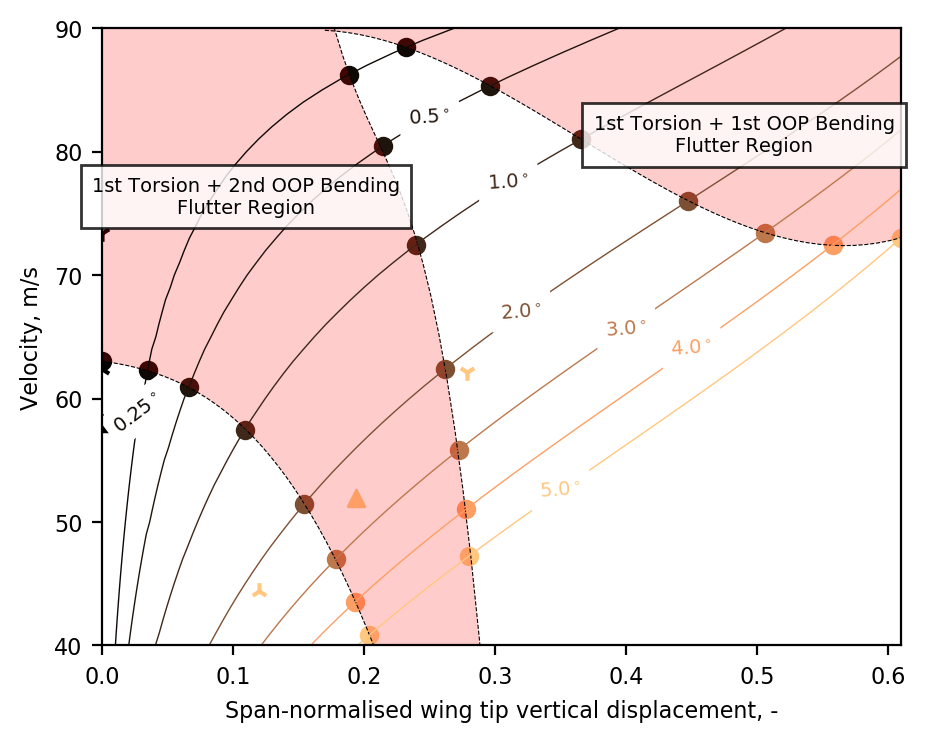

In [285]:
cmap = plt.get_cmap('copper')
nrm = plt.Normalize(vmin=0, vmax=5)
boundaries = []
lims = [(0, 0.3), (0.0, 0.3), (0.17, 0.61)]
marker_l = ['o', 's', 'o']

w = 12 / 2.54
h = w * 0.8
fig = plt.figure(figsize=(w, h))
ax = plt.gca()

case = sharpy_results['wo_skin']

flutter_speeds = np.zeros((len(case), 3))
flutter_deflections = np.zeros((len(case), 3))

for ith, aoa in enumerate(case['alpha']):
    for i_speed in range(case['flutter_deflection'][ith].shape[0]):
        plt.scatter(case['flutter_deflection'][ith][i_speed, 1], case['flutter_deflection'][ith][i_speed, 0], color=cmap(nrm(aoa)))
        flutter_speeds[ith, i_speed] = case['flutter_deflection'][ith][i_speed, 0]
        flutter_deflections[ith, i_speed] = case['flutter_deflection'][ith][i_speed, 1]
#     plt.plot(case['deflection'][ith][:, -1] / 0.55, case['deflection'][ith][:, 0], color=cmap(nrm(aoa)), lw=0.5)

# MRM RESULTS
mrmcase = mrm_results['umbeam_wo_skin']
for ith, aoa in enumerate(mrmcase['alpha']):
    plt.scatter(mrmcase['flutter_deflection'][ith][1], mrmcase['flutter_deflection'][ith][0], color=cmap(nrm(aoa)), marker='^')
mrmcase = mrm_results['umbeam_w_skin']
for ith, aoa in enumerate(mrmcase['alpha']):
    plt.scatter(mrmcase['flutter_deflection'][ith][1], mrmcase['flutter_deflection'][ith][0], color=cmap(nrm(aoa)), marker='1')
    
mrmcase = mrm_results['nastran']
for ith, aoa in enumerate(mrmcase['alpha']):
    plt.scatter(mrmcase['flutter_deflection'][ith][1], mrmcase['flutter_deflection'][ith][0], color=cmap(nrm(aoa)), marker='2')

case0 = results['sharpy_wo_skin']
plt.scatter(0, case0['flutter_speed'], color=cmap(nrm(0)))

for i_flutter in range(3):
    x = np.array(flutter_speeds[:, i_flutter])

    order = np.argsort(x)
    x = x[order]
    
    y = np.array(flutter_deflections[:, i_flutter])[order]
    if i_flutter == 0:
        x = np.concatenate(([case0['flutter_speed']], x))
        y = np.concatenate(([0], y))
    order = np.argsort(y)
    x = x[order]
    y = y[order]
    print(x)
    print(y)


    p = np.polyfit(y, x, 3)
    xd = np.linspace(lims[i_flutter][0], lims[i_flutter][1])
    yd = np.polyval(p, xd)
    boundaries.append((xd, yd))
    plt.plot(xd, yd, color='k', ls='--', lw=0.4)
#     plt.plot(y, x, color='k', ls='--', lw=1)


# CONTOUR LABELED LINES
lines = []
for ith, aoa in enumerate(case['alpha']):
    line = ax.plot(case['deflection'][ith][:, -1] / 0.55, case['deflection'][ith][:, 0], color=cmap(nrm(aoa)), lw=0.5, label=r'${}^\circ$'.format(aoa))
    lines.append(line)
    
plt.fill_between(boundaries[0][0], boundaries[0][1], boundaries[1][1], facecolor='red', alpha=0.2)
plt.fill_between(boundaries[2][0], boundaries[2][1], np.ones_like(boundaries[2][1]) * 100, facecolor='red', alpha=0.2)
# plt.fill_between(boundaries[2][0], boundaries[2][1], boundaries[1][1], where=boundaries[1][1]<boundaries[2][1], facecolor='red', alpha=0.2)

xpos_label = [0.028, 0.25, 0.31, 0.32, 0.4, 0.45, 0.35]
labelLines(plt.gca().get_lines(), xvals=xpos_label, backgroundcolor='white', fontsize=7)

plt.text(0.11, 75, '1st Torsion + 2nd OOP Bending\nFlutter Region', 
         bbox={'facecolor': 'white', 'alpha':0.8}, fontsize=7,
        horizontalalignment='center')

plt.text(0.49, 80, '1st Torsion + 1st OOP Bending\nFlutter Region', 
         bbox={'facecolor': 'white', 'alpha':0.8}, fontsize=7,
        horizontalalignment='center')



plt.ylim(40, 90)
plt.xlim(0, 0.61)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(8)

# plt.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap=cmap), label='Angle of Attack, deg')
plt.xlabel('Span-normalised wing tip vertical displacement, -', fontsize=8)
plt.ylabel('Velocity, m/s', fontsize=8)
# plt.grid()
plt.tight_layout();
# plt.savefig('../figures/05_Flutter_regions_wo_skin.pdf');

[63.0035     62.29835363 60.90798066 57.48837521 51.46062728 47.00226703
 43.54520241 40.83043105]
[0.         0.03478037 0.06620139 0.10896093 0.15435189 0.17848224
 0.19332756 0.20398101]
[86.23251615 80.43158182 72.44735042 62.38640713 55.82736672 51.05675344
 47.25671604]
[0.18834666 0.21406511 0.23948079 0.26185501 0.27219725 0.27810058
 0.28032005]
[88.44206259 85.31635495 81.01796134 76.0140333  73.41051977 72.43755647
 73.01698213]
[0.23218054 0.29615818 0.36587968 0.44736353 0.5056297  0.55757987
 0.60985634]


Text(0, 0.5, 'Velocity, m/s')

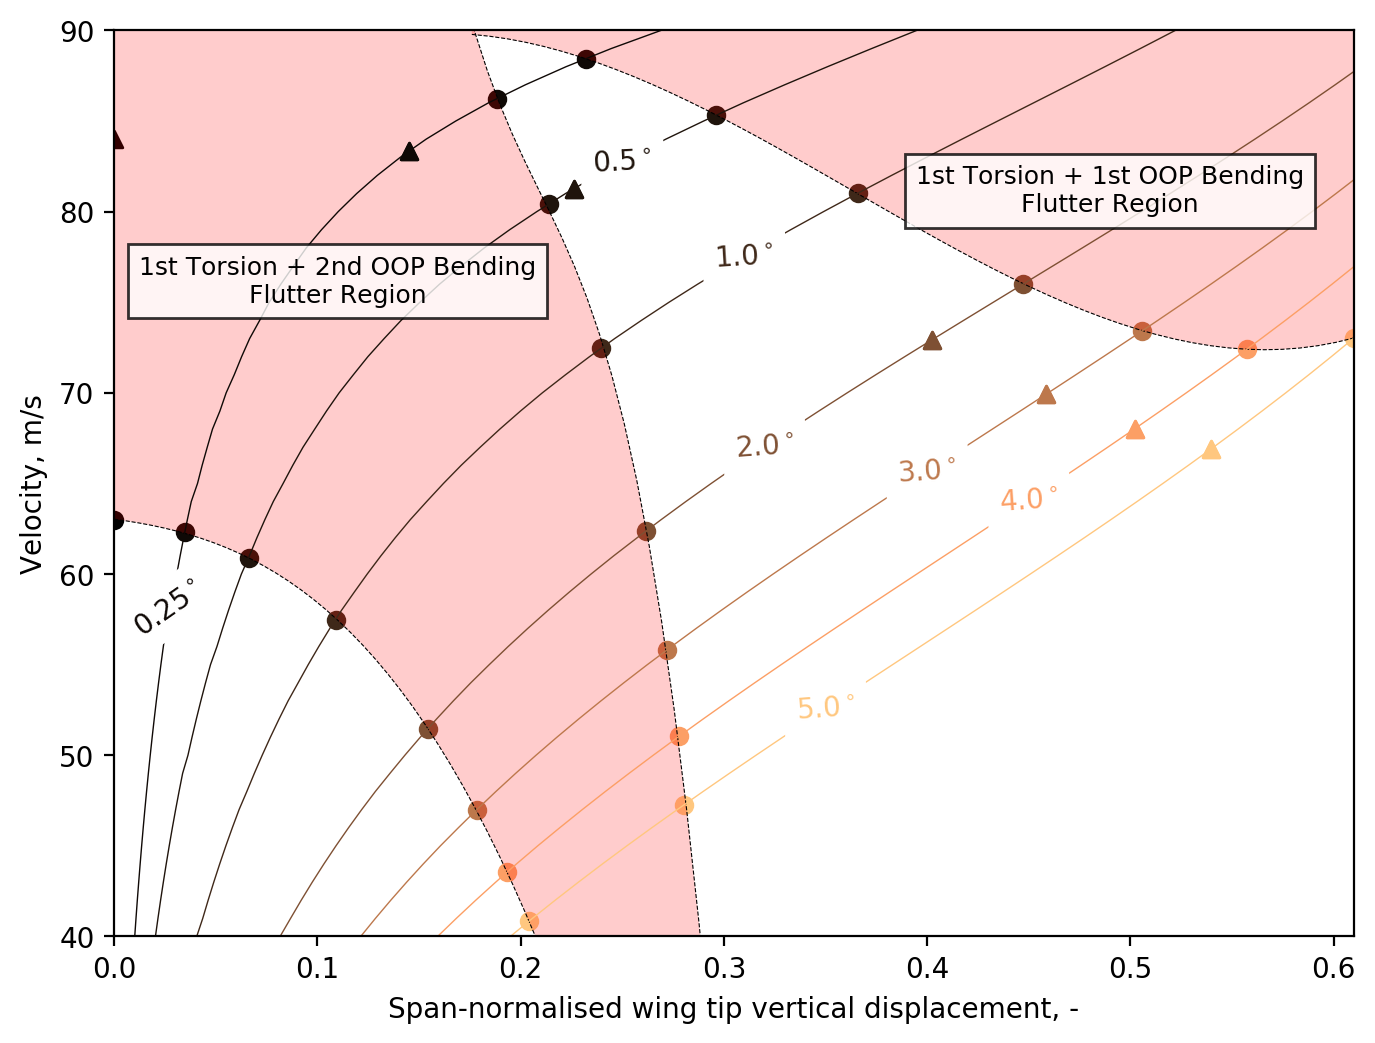

In [212]:
cmap = plt.get_cmap('copper')
nrm = plt.Normalize(vmin=0, vmax=5)
boundaries = []
lims = [(0, 0.3), (0.0, 0.3), (0.176, 0.61)]
marker_l = ['o', 's', 'o']
ax = plt.gca()

case = sharpy_results['wo_skin']

flutter_speeds = np.zeros((len(case), 3))
flutter_deflections = np.zeros((len(case), 3))

for ith, aoa in enumerate(case['alpha']):
    for i_speed in range(case['flutter_deflection'][ith].shape[0]):
        plt.scatter(case['flutter_deflection'][ith][i_speed, 1], case['flutter_deflection'][ith][i_speed, 0], color=cmap(nrm(aoa)))
        flutter_speeds[ith, i_speed] = case['flutter_deflection'][ith][i_speed, 0]
        flutter_deflections[ith, i_speed] = case['flutter_deflection'][ith][i_speed, 1]
#     plt.plot(case['deflection'][ith][:, -1] / 0.55, case['deflection'][ith][:, 0], color=cmap(nrm(aoa)), lw=0.5)

case0 = results['sharpy_wo_skin']
plt.scatter(0, case0['flutter_speed'], color=cmap(nrm(0)))

case0te = results['sharpy_wo_skin_te']
plt.scatter(0, case0te['flutter_speed'], color=cmap(nrm(0)), marker='^')

for i_flutter in range(3):
    x = np.array(flutter_speeds[:, i_flutter])

    order = np.argsort(x)
    x = x[order]
    
    y = np.array(flutter_deflections[:, i_flutter])[order]
    if i_flutter == 0:
        x = np.concatenate(([case0['flutter_speed']], x))
        y = np.concatenate(([0], y))
    order = np.argsort(y)
    x = x[order]
    y = y[order]
    print(x)
    print(y)


    p = np.polyfit(y, x, 3)
    xd = np.linspace(lims[i_flutter][0], lims[i_flutter][1])
    yd = np.polyval(p, xd)
    boundaries.append((xd, yd))
    plt.plot(xd, yd, color='k', ls='--', lw=0.4)
#     plt.plot(y, x, color='k', ls='--', lw=1)


# CONTOUR LABELED LINES
lines = []
for ith, aoa in enumerate(case['alpha']):
    line = ax.plot(case['deflection'][ith][:, -1] / 0.55, case['deflection'][ith][:, 0], color=cmap(nrm(aoa)), lw=0.5, label=r'${}^\circ$'.format(aoa))
    lines.append(line)
    
plt.fill_between(boundaries[0][0], boundaries[0][1], boundaries[1][1], facecolor='red', alpha=0.2)
plt.fill_between(boundaries[2][0], boundaries[2][1], np.ones_like(boundaries[2][1]) * 100, facecolor='red', alpha=0.2)
# plt.fill_between(boundaries[2][0], boundaries[2][1], boundaries[1][1], where=boundaries[1][1]<boundaries[2][1], facecolor='red', alpha=0.2)

xpos_label = [0.027, 0.25, 0.31, 0.32, 0.4, 0.45, 0.35]
labelLines(plt.gca().get_lines(), xvals=xpos_label, backgroundcolor='white')

plt.text(0.11, 75, '1st Torsion + 2nd OOP Bending\nFlutter Region', 
         bbox={'facecolor': 'white', 'alpha':0.8}, fontsize=9,
        horizontalalignment='center')

plt.text(0.49, 80, '1st Torsion + 1st OOP Bending\nFlutter Region', 
         bbox={'facecolor': 'white', 'alpha':0.8}, fontsize=9,
        horizontalalignment='center')

case = sharpy_results['wo_skin_te']
for ith, aoa in enumerate(case['alpha']):
    for i_speed in range(case['flutter_deflection'][ith].shape[0]):
        plt.scatter(case['flutter_deflection'][ith][1], case['flutter_deflection'][ith][0], color=cmap(nrm(aoa)), marker='^')

plt.ylim(40, 90)
plt.xlim(0, 0.61)


# plt.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap=cmap), label='Angle of Attack, deg')
plt.xlabel('Span-normalised wing tip vertical displacement, -')
plt.ylabel('Velocity, m/s')
# plt.grid()


[84.54018742 82.39110857 79.31079207 75.89589236 74.62880229 75.21489306
 77.31560424]
[0.32568606 0.36935124 0.42354347 0.4979867  0.55901696 0.61938693
 0.67704844]


Text(0, 0.5, 'Velocity, m/s')

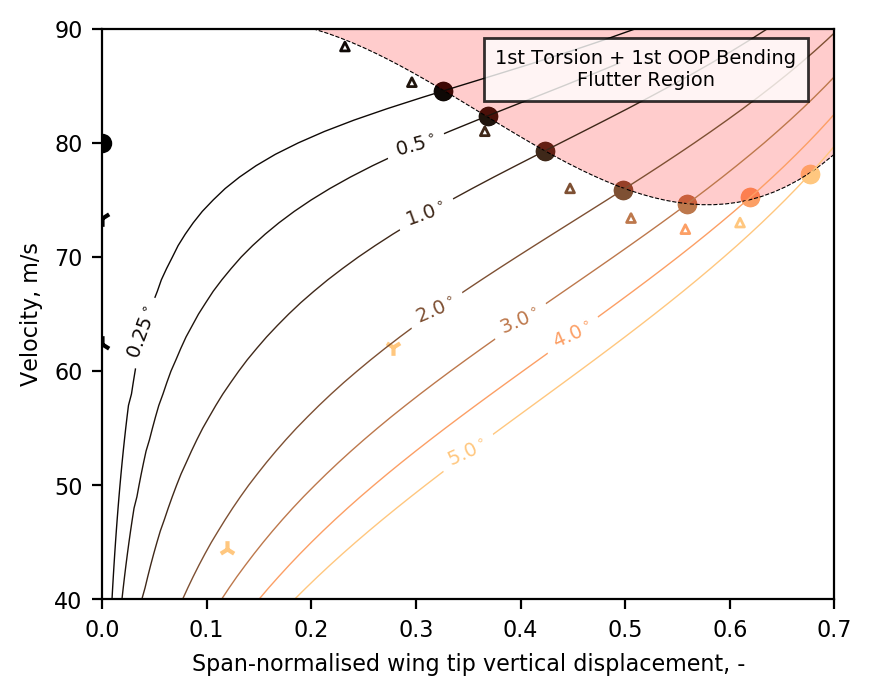

In [282]:
cmap = plt.get_cmap('copper')
nrm = plt.Normalize(vmin=0, vmax=5)
boundaries = []
lims = [(0.135, 0.7)]
marker_l = ['o', 's', 'o']

w = 12 / 2.54
h = w * 0.8
fig = plt.figure(figsize=(w, h))
ax = plt.gca()

case = sharpy_results['wo_skin']

for ith, aoa in enumerate(case['alpha']):
    for i_speed in range(case['flutter_deflection'][ith].shape[0]):
        if i_speed != 2:
            continue
        plt.scatter(case['flutter_deflection'][ith][i_speed, 1], case['flutter_deflection'][ith][i_speed, 0], edgecolor=cmap(nrm(aoa)), marker='^', facecolor='none',
                   s=10)

# MRM RESULTS
mrmcase = mrm_results['umbeam_w_skin']
for ith, aoa in enumerate(mrmcase['alpha']):
    plt.scatter(mrmcase['flutter_deflection'][ith][1], mrmcase['flutter_deflection'][ith][0], color=cmap(nrm(aoa)), marker='1')
    
mrmcase = mrm_results['nastran']
for ith, aoa in enumerate(mrmcase['alpha']):
    plt.scatter(mrmcase['flutter_deflection'][ith][1], mrmcase['flutter_deflection'][ith][0], color=cmap(nrm(aoa)), marker='2')

case = sharpy_results['w_skin']

flutter_speeds = np.zeros((len(case), 3))
flutter_deflections = np.zeros((len(case), 3))

for ith, aoa in enumerate(case['alpha']):
    for i_speed in range(case['flutter_deflection'][ith].shape[0]):
        plt.scatter(case['flutter_deflection'][ith][1], case['flutter_deflection'][ith][0], color=cmap(nrm(aoa)))
        flutter_speeds[ith, i_speed] = case['flutter_deflection'][ith][0]
        flutter_deflections[ith, i_speed] = case['flutter_deflection'][ith][1]
#     plt.plot(case['deflection'][ith][:, -1] / 0.55, case['deflection'][ith][:, 0], color=cmap(nrm(aoa)), lw=0.5)

case0 = results['sharpy_w_skin']
plt.scatter(0, case0['flutter_speed'], color=cmap(nrm(0)))

for i_flutter in range(1):
    x = np.array(flutter_speeds[:, i_flutter])

    order = np.argsort(x)
    x = x[order]
    
    y = np.array(flutter_deflections[:, i_flutter])[order]
#     if i_flutter == 0:
#         x = np.concatenate(([case0['flutter_speed']], x))
#         y = np.concatenate(([0], y))
    order = np.argsort(y)
    x = x[order]
    y = y[order]
    print(x)
    print(y)


    p = np.polyfit(y, x, 3)
    xd = np.linspace(lims[i_flutter][0], lims[i_flutter][1])
    yd = np.polyval(p, xd)
    boundaries.append((xd, yd))
    plt.plot(xd, yd, color='k', ls='--', lw=0.4)
#     plt.plot(y, x, color='k', ls='--', lw=1)


# # CONTOUR LABELED LINES
lines = []
for ith, aoa in enumerate(case['alpha']):
    line = ax.plot(case['deflection'][ith][:, -1] / 0.55, case['deflection'][ith][:, 0], color=cmap(nrm(aoa)), lw=0.5, label=r'${}^\circ$'.format(aoa))
    lines.append(line)
    
# plt.fill_between(boundaries[0][0], boundaries[0][1], boundaries[1][1], facecolor='red', alpha=0.2)
plt.fill_between(boundaries[0][0], boundaries[0][1], np.ones_like(boundaries[0][1]) * 100, facecolor='red', alpha=0.2)
# plt.fill_between(boundaries[0][0], boundaries[0][1], facecolor='red', alpha=0.2)

xpos_label = [0.04, 0.3, 0.31, 0.32, 0.4, 0.45, 0.35]
labelLines(plt.gca().get_lines(), xvals=xpos_label, backgroundcolor='white', fontsize=7)

plt.text(0.52, 85, '1st Torsion + 1st OOP Bending\nFlutter Region', 
         bbox={'facecolor': 'white', 'alpha':0.8}, fontsize=7,
        horizontalalignment='center')


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(8)



plt.ylim(40, 90)
plt.xlim(0, 0.7)


# plt.colorbar(mpl.cm.ScalarMappable(norm=nrm, cmap=cmap), label='Angle of Attack, deg')
plt.xlabel('Span-normalised wing tip vertical displacement, -')
plt.ylabel('Velocity, m/s')
# plt.title('Skin on');
# plt.savefig('../figures/05_Flutter_regions_w_skin.pdf');

# Eigenvalue Plot

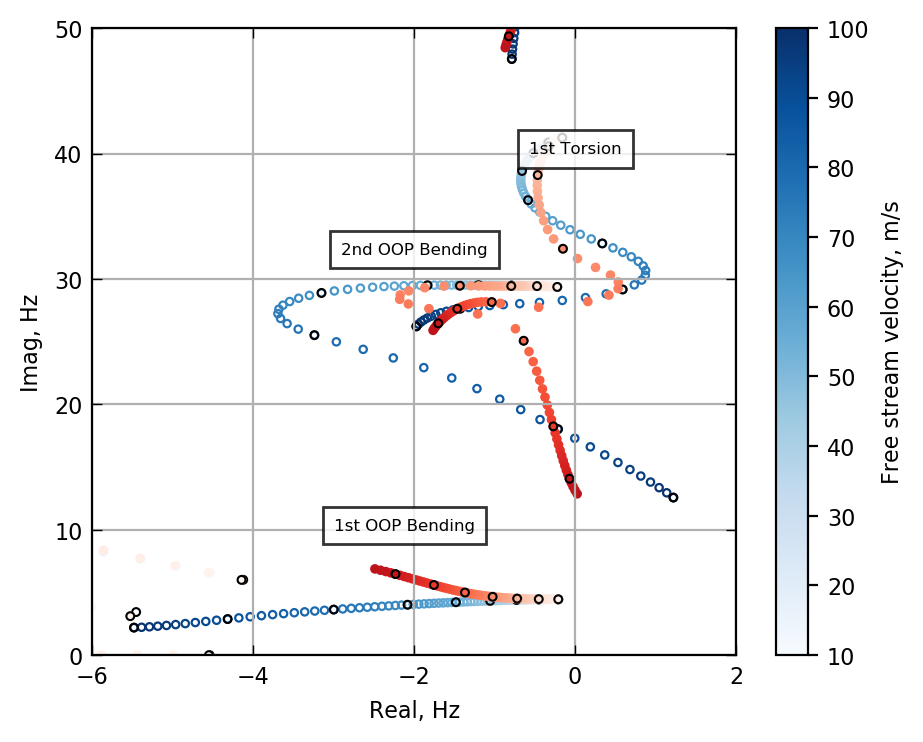

In [234]:
case = sharpy_results['wo_skin']

w = 12 / 2.54
h = w * 0.8
fig, ax = plt.subplots(figsize=(w, h), sharex=True)
cmap = plt.get_cmap('Blues')
cmap2 = plt.get_cmap('Reds')
nrmvel = plt.Normalize(vmin=10, vmax=90)


for ith, aoa in enumerate(case['alpha']):
    if aoa != 1:
        continue
    r_eigs = case['v_eigs'][ith][:, 1] / 2 / np.pi
    i_eigs = case['v_eigs'][ith][:, 2] / 2 / np.pi
    v_eigs = case['v_eigs'][ith][:, 0]

    ax.scatter(r_eigs, i_eigs, color=cmap(nrmvel(v_eigs)), s=7, linewidth=.8, facecolor='none',
               label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    for vel in np.linspace(10, 120, 12):
        vel_ind = (v_eigs == vel)
        ax.scatter(r_eigs[vel_ind], i_eigs[vel_ind], marker='o', color='none', edgecolor='k', s=8, linewidth=0.75)
        
for ith, aoa in enumerate(case['alpha']):
    if aoa != 5:
        continue
    r_eigs = case['v_eigs'][ith][:, 1] / 2 / np.pi
    i_eigs = case['v_eigs'][ith][:, 2] / 2 / np.pi
    v_eigs = case['v_eigs'][ith][:, 0]
    ax.scatter(r_eigs, i_eigs, color=cmap2(nrmvel(v_eigs)), s=6,
                 label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    for vel in np.linspace(10, 120, 12):
        vel_ind = (v_eigs == vel)
        ax.scatter(r_eigs[vel_ind], i_eigs[vel_ind], marker='o', color='none', edgecolor='k', s=8, linewidth=0.75)
    
# ax.legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3, mode='expand', fontsize=7)
    
# # mode description
ax.text(-3, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax.text(-2, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax.text(0, 40, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

# ax[1].text(82, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
# ax[1].text(70, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for tick in ax.get_xticklabels(): 
    tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
    tick.set_fontsize(8)
    
for tick in ax.get_yticklabels(): 
    tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
    tick.set_fontsize(8)


ax.set_ylim(-0, 50)
ax.set_xlim(-6, 2)
# ax[0].grid()
# ax[1].set_ylim(0, 50)
# ax[1].set_xlim(10, 90)
# ax[1].grid()
ax.set_xlabel('Real, Hz', fontsize=8)
ax.set_ylabel('Imag, Hz', fontsize=8)
# ax[0].set_ylabel('Damping ratio, -', fontsize=8)
# ax[0].set_title('Skin off')

sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Blues')
cb = plt.colorbar(sm, ax=ax)
cb.set_label('Free stream velocity, m/s', fontsize=8)
cb.ax.tick_params(labelsize=8)


ax.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
ax.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
ax.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
ax.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)
# fig.align_ylabels(ax)
ax.grid()
plt.tight_layout()
plt.savefig('../figures/05_DeformedEigs.pdf');

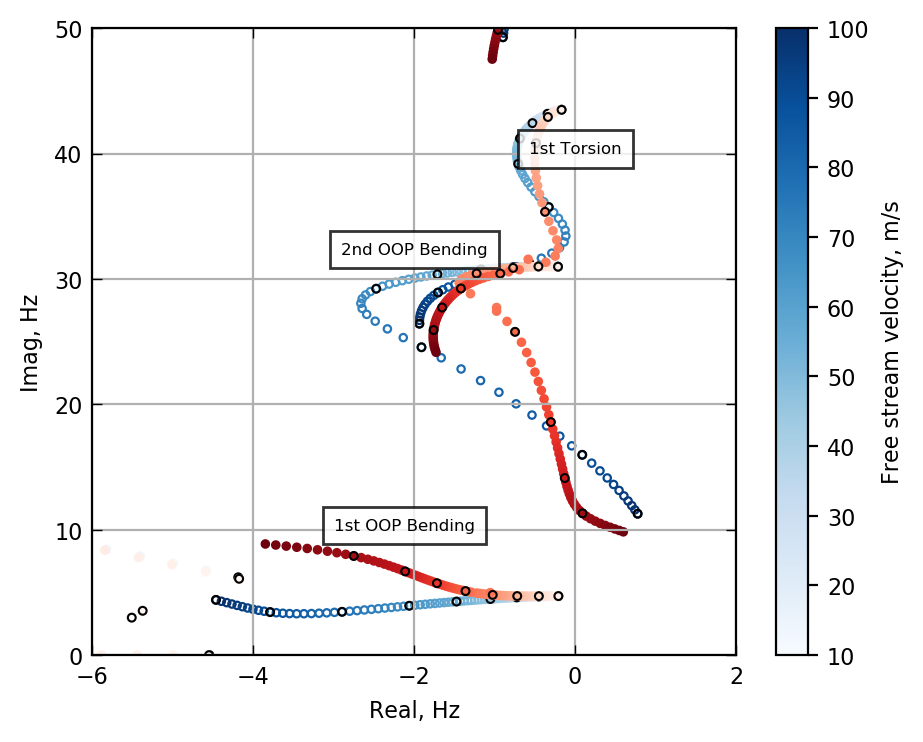

In [238]:
case = sharpy_results['w_skin']

w = 12 / 2.54
h = w * 0.8
fig, ax = plt.subplots(figsize=(w, h), sharex=True)
cmap = plt.get_cmap('Blues')
cmap2 = plt.get_cmap('Reds')
nrmvel = plt.Normalize(vmin=10, vmax=90)


for ith, aoa in enumerate(case['alpha']):
    if aoa != 1:
        continue
    r_eigs = case['v_eigs'][ith][:, 1] / 2 / np.pi
    i_eigs = case['v_eigs'][ith][:, 2] / 2 / np.pi
    v_eigs = case['v_eigs'][ith][:, 0]

    ax.scatter(r_eigs, i_eigs, color=cmap(nrmvel(v_eigs)), s=7, linewidth=.8, facecolor='none',
               label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    
    for vel in np.linspace(10, 120, 12):
        vel_ind = (v_eigs == vel)
        ax.scatter(r_eigs[vel_ind], i_eigs[vel_ind], marker='o', color='none', edgecolor='k', s=8, linewidth=0.75)
    
for ith, aoa in enumerate(case['alpha']):
    if aoa != 5:
        continue
    r_eigs = case['v_eigs'][ith][:, 1] / 2 / np.pi
    i_eigs = case['v_eigs'][ith][:, 2] / 2 / np.pi
    v_eigs = case['v_eigs'][ith][:, 0]
    ax.scatter(r_eigs, i_eigs, color=cmap2(nrmvel(v_eigs)), s=6,
                 label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    
    for vel in np.linspace(10, 120, 12):
        vel_ind = (v_eigs == vel)
        ax.scatter(r_eigs[vel_ind], i_eigs[vel_ind], marker='o', color='none', edgecolor='k', s=8, linewidth=0.75)
    
# ax.legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3, mode='expand', fontsize=7)
    
# # mode description
ax.text(-3, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax.text(-2, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax.text(0, 40, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

# ax[1].text(82, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
# ax[1].text(70, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for tick in ax.get_xticklabels(): 
    tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
    tick.set_fontsize(8)
    
for tick in ax.get_yticklabels(): 
    tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
    tick.set_fontsize(8)


ax.set_ylim(-0, 50)
ax.set_xlim(-6, 2)
# ax[0].grid()
# ax[1].set_ylim(0, 50)
# ax[1].set_xlim(10, 90)
# ax[1].grid()
ax.set_xlabel('Real, Hz', fontsize=8)
ax.set_ylabel('Imag, Hz', fontsize=8)
# ax[0].set_ylabel('Damping ratio, -', fontsize=8)
# ax[0].set_title('Skin off')

sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Blues')
cb = plt.colorbar(sm, ax=ax)
cb.set_label('Free stream velocity, m/s', fontsize=8)
cb.ax.tick_params(labelsize=8)


ax.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
ax.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
ax.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
ax.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)
# fig.align_ylabels(ax)
ax.grid()
plt.tight_layout()
plt.savefig('../figures/05_DeformedEigs_w_skin.pdf');

# V-g-omega plot

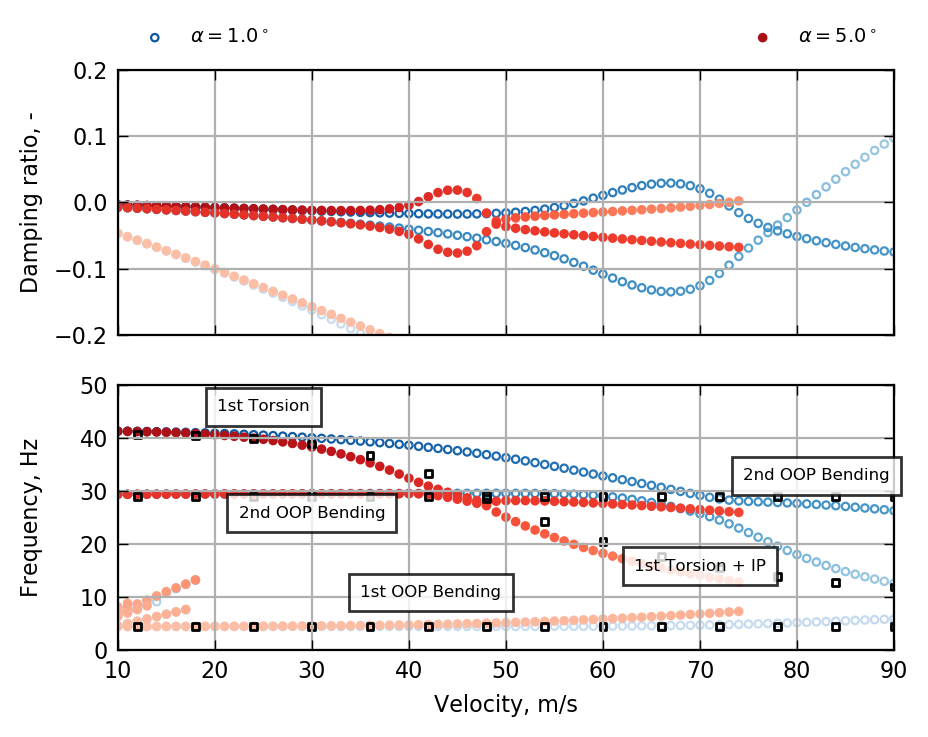

In [297]:
case = sharpy_results['wo_skin']

w = 12 / 2.54
h = w * 0.8
fig, ax = plt.subplots(nrows=2, figsize=(w, h), sharex=True)
cmap = plt.get_cmap('Blues')
cmap2 = plt.get_cmap('Reds')
nrm2 = plt.Normalize(vmin=-10, vmax=50)



for ith, aoa in enumerate(case['alpha']):
    if aoa != 1:
        continue
    conditions = (case['vgf'][ith][:, 2] < 45)

    ax[0].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 1], color=cmap(nrm2(case['vgf'][ith][conditions, 2])), s=7, linewidth=.8, facecolor='none',
                 label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    ax[1].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 2], color=cmap(nrm2(case['vgf'][ith][conditions, 2])), s=7, linewidth=.8, facecolor='none')
    
for ith, aoa in enumerate(case['alpha']):
    if aoa != 5:
        continue
    conditions = case['vgf'][ith][:, 2] < 45
    ax[0].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 1], color=cmap2(nrm2(case['vgf'][ith][conditions, 2])), s=6,
                 label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    ax[1].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 2], color=cmap2(nrm2(case['vgf'][ith][conditions, 2])), s=6)

# MRM RESULTS
mrmcase = mrm_results['umbeam_wo_skin']
for ith, aoa in enumerate(mrmcase['alpha']):
    if aoa != 5:
        continue
    conditions = mrmcase['vgf'][ith][:, 1] < 45
    ax[1].scatter(mrmcase['vgf'][ith][conditions, 0], mrmcase['vgf'][ith][conditions, 1], color='k', facecolor='none', s=6, marker='s')
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3, mode='expand', fontsize=7)
    
# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax[1].text(30, 25, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(25, 45, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[1].text(82, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(70, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for a in ax:
    for tick in a.get_xticklabels(): 
        tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
        tick.set_fontsize(8)
    
for a in ax:
    for tick in a.get_yticklabels(): 
        tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
        tick.set_fontsize(8)


ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].set_xlim(10, 90)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s', fontsize=8)
ax[1].set_ylabel('Frequency, Hz', fontsize=8)
ax[0].set_ylabel('Damping ratio, -', fontsize=8)
# ax[0].set_title('Skin off')
ax[1].set_yticks(np.linspace(0, 50, 6))




for a in ax:
    a.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
    a.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
    a.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
    a.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)
fig.align_ylabels(ax)
plt.tight_layout()
# plt.savefig('../figures/05_DeformedVg_wo_skin.pdf');

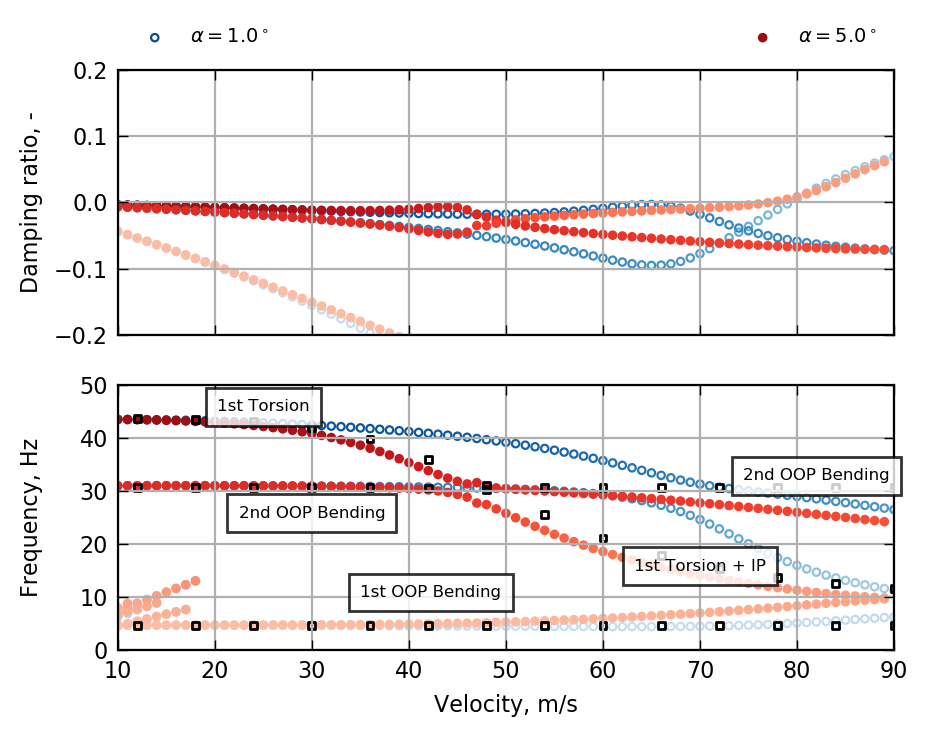

In [296]:
case = sharpy_results['w_skin']

w = 12 / 2.54
h = w * 0.8
fig, ax = plt.subplots(nrows=2, figsize=(w, h), sharex=True)
cmap = plt.get_cmap('Blues')
cmap2 = plt.get_cmap('Reds')
nrm2 = plt.Normalize(vmin=-10, vmax=50)



for ith, aoa in enumerate(case['alpha']):
    if aoa != 1:
        continue
    conditions = (case['vgf'][ith][:, 2] < 45)

    ax[0].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 1], color=cmap(nrm2(case['vgf'][ith][conditions, 2])), s=7, linewidth=.8, facecolor='none',
                 label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    ax[1].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 2], color=cmap(nrm2(case['vgf'][ith][conditions, 2])), s=7, linewidth=.8, facecolor='none')
    
for ith, aoa in enumerate(case['alpha']):
    if aoa != 5:
        continue
    conditions = case['vgf'][ith][:, 2] < 45
    ax[0].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 1], color=cmap2(nrm2(case['vgf'][ith][conditions, 2])), s=6,
                 label=r'$\alpha = {:.1f}^\circ$'.format(aoa))
    ax[1].scatter(case['vgf'][ith][conditions, 0], case['vgf'][ith][conditions, 2], color=cmap2(nrm2(case['vgf'][ith][conditions, 2])), s=6)
    
# MRM RESULTS
mrmcase = mrm_results['umbeam_w_skin']
for ith, aoa in enumerate(mrmcase['alpha']):
    if aoa != 5:
        continue
    conditions = mrmcase['vgf'][ith][:, 1] < 45
    ax[1].scatter(mrmcase['vgf'][ith][conditions, 0], mrmcase['vgf'][ith][conditions, 1], color='k', facecolor='none', s=6, marker='s')
    
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3, mode='expand', fontsize=7)
    
# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax[1].text(30, 25, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(25, 45, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[1].text(82, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(70, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for a in ax:
    for tick in a.get_xticklabels(): 
        tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
        tick.set_fontsize(8)
    
for a in ax:
    for tick in a.get_yticklabels(): 
        tick.set_fontname('Helvetica')
#     tick.set_fontname('Times New Roman')
        tick.set_fontsize(8)


ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].set_yticks(np.linspace(0, 50, 6))
ax[1].set_xlim(10, 90)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s', fontsize=8)
ax[1].set_ylabel('Frequency, Hz', fontsize=8)
ax[0].set_ylabel('Damping ratio, -', fontsize=8)
# ax[0].set_title('Skin off')


for a in ax:
    a.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
    a.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
    a.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
    a.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)
fig.align_ylabels(ax)
plt.tight_layout()
# plt.savefig('../figures/05_DeformedVg_w_skin.pdf');